## Practicing with ImageMagick

In [57]:
# all imports go at the top of the notebook
import urllib
from IPython.display import Image
from IPython.display import HTML
from IPython.display import display
import os
import shutil
from scipy.misc import imread
from matplotlib import pylab as plt
%matplotlib inline

### Setup

In [58]:
# This helper function will clean out the directories
def reset_directories():
    # make the inputs, temp, and outputs directory if it does not exist
    if not os.path.exists("inputs"):
        os.mkdir("inputs")

    # remove the old output directory (if there)
    if os.path.exists("temp"):
        shutil.rmtree("temp")
    # make a new outputs directory
    os.mkdir("temp")

    # remove the old output directory (if there)
    if os.path.exists("outputs"):
        shutil.rmtree("outputs")
    # make a new outputs directory
    os.mkdir("outputs")


In [59]:
# This helper function will show different versions of a file
def show_versions(images, captions=None):
    num_images = len(images)
    plt_height = 3
    plt_width = plt_height * num_images
    plt.figure(figsize=(plt_width, plt_height))
    for i,f in enumerate(images):
        plt.subplot(1,num_images+1,1+i)
        plt.imshow(imread(f))
        plt.axis('off')
        if captions is not None:
            plt.title(captions[i])

In [60]:
# this downloads a cat clipart image
remote_file = "http://cliparting.com/wp-content/uploads/2016/05/Cat-clipart-6-2.png"
input_file = "inputs/cat.jpg"
urllib.urlretrieve(remote_file, input_file)
!identify {input_file}

inputs/cat.jpg PNG 555x675 555x675+0+0 8-bit sRGB 228KB 0.000u 0:00.000


### Exercise 1: horizontal pan example

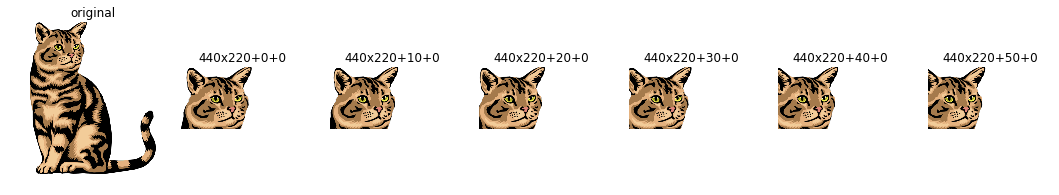

In [61]:
reset_directories()

images = [input_file]
commands = ["original"]
for i in range(6):
    temp_file = "temp/file_{:03}.png".format(i)
    offset_x = i * 10
    offset_y = 0
    crop_area = "440x220+{}+{}".format(offset_x, offset_y)
    cur_command = "convert {} -crop {} {}".format(input_file, crop_area, temp_file)
    images.append(temp_file)
    commands.append(crop_area)
    os.system(cur_command)

show_versions(images, commands)

### Exercise 2: Zoom example

convert inputs/cat.jpg -matte -border 500 temp/fatcat.png


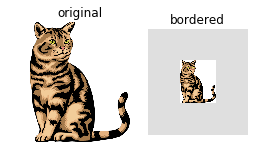

In [62]:
# Step 1, clear directories and make a version of the cat with a border
reset_directories()
border_file = "temp/fatcat.png"

cur_command = "convert {} -matte -border 500 {}".format(input_file, border_file)
os.system(cur_command)
print(cur_command)

show_versions([input_file, border_file], ["original", "bordered"])

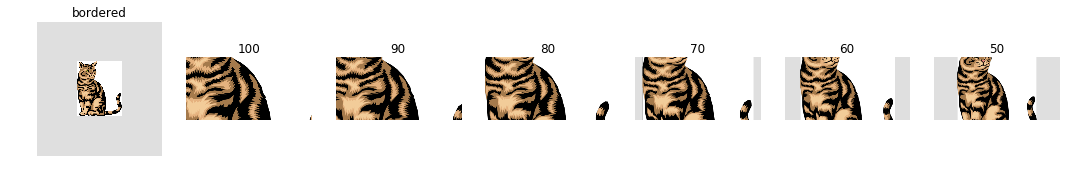

In [63]:
# step two, use the bordered image for the zoom

images = [border_file]
commands = ["bordered"]
for i in range(6):
    temp_file = "temp/file_{:03}.png".format(i)
    zoom = 100 - 10 * i
    cur_command = "convert {} -resize {}% -gravity center -crop 440x220+0+0 {}".format(border_file, zoom, temp_file)
    images.append(temp_file)
    commands.append(zoom)
    os.system(cur_command)

show_versions(images, commands)